# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



# Описание проекта

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.
Итогом проекта явлются ответы на вопросы:

* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?
* Приведите возможные причины появления пропусков в исходных данных.
* Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.
* Общий вывод и рекомендации

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sns


data = pd.read_csv('/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

<a id='step_3'></a>

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

В задании будут использоваться однотипные операции для анализа данных, поэтому я сделаю функцию, которая составляет таблицу с данными для анализа и буду ее использовать в дальнейших шагах. Функция будет получать на вход датафрейм и категорию для анализа, на выход будет возвращать массив данных для анализа:

* группа, по которой ведем анализ;
* абсолютное количество просрочек по группам;
* количество клиентов в группах;
* процент просрочек в группах.

In [22]:
def rate(row,param):
    data = row.groupby(param).agg({'debt':'sum'})
    data['count'] = row.groupby(param)['debt'].count()
    data['%'] = round((data['debt'] / data['count']) * 100,2)
    return data

In [23]:
children_debt = rate(data,'children')
children_debt.columns = ['Количество просрочников', 'Общее количество заемщиков', '%']
children_debt.sort_values('children')  #Есть ли зависимость между количеством детей и возвратом кредита в срок

,Количество просрочников,Общее количество заемщиков,%
children,,,
0,1063,14091,7.54
1,444,4808,9.23
2,194,2052,9.45
3,27,330,8.18
4,4,41,9.76
5,0,9,0.00


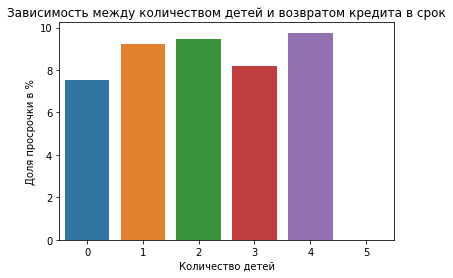

In [26]:
# итоговый вариант 
import matplotlib.pyplot as plt
sns.barplot(x=x, y=y)
plt.title('Зависимость между количеством детей и возвратом кредита в срок')
plt.xlabel('Количество детей')
plt.ylabel('Доля просрочки в %')
plt.show()

**Вывод:** Заемщики без детей выплачивают кредиты исправнее, чем заемщики с детьми.Несмотря на максимальное количество клиентов с просроченными кредитами у которых нет детей, доля их в сравнении с иными категориями клиентов меньшая и составляет 7,54 %, в то время как доли просроченных кредитов у клиентов имеющих от 1 до 4 детей - от 8,18 % до 9,76 %. В силу малого количества попавших в выборку клиентов с 5-ю детьми, данные по ним можно нивелировать.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [27]:
data_family = rate(data,'family_status')
data_family.columns = ['Количество просрочников', 'Общее количество заемщиков', '%']
data_family.sort_values(by='%', ascending=False)
# Ваш код будет здесь. Вы можете создавать новые ячейки.

,Количество просрочников,Общее количество заемщиков,%
family_status,,,
Не женат / не замужем,273,2796,9.76
гражданский брак,385,4134,9.31
женат / замужем,927,12261,7.56
в разводе,84,1189,7.06
вдовец / вдова,63,951,6.62


**Вывод:** Наименьшие задолженности по платежам принадлежат группе вдов и вдовцов, в то время как у клиентов, которые не находятся в отношениях в 1.5 раза выше, чем у вдов/вдовцов. В большей степени просрочку допускают заемщики, не обремененные семейными узами,но также недалеко отстают от них лица, живущие в гражданском браке.

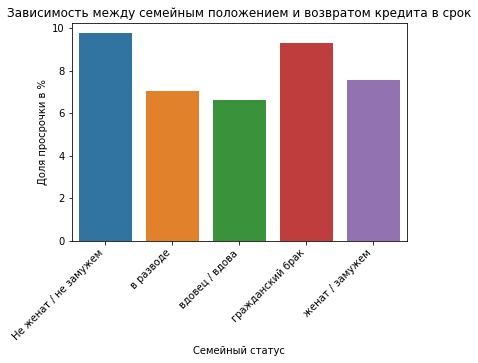

In [30]:
sns.barplot(x=data_family.index, y=data_family['%'])
plt.xticks(rotation=45, ha='right')
plt.title('Зависимость между семейным положением и возвратом кредита в срок')
plt.xlabel('Семейный статус')
plt.ylabel('Доля просрочки в %')
plt.show()

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [31]:
data_income = rate(data,'total_income_category')
data_income.columns = ['Количество просрочников', 'Общее количество заемщиков', '%']
data_income.sort_values(by='%', ascending=True)

,Количество просрочников,Общее количество заемщиков,%
total_income_category,,,
D,21,349,6.02
B,354,5014,7.06
A,2,25,8.00
C,1353,15921,8.50
E,2,22,9.09


* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'.

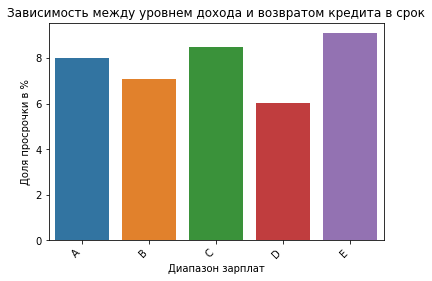

In [33]:
sns.barplot(x=data_income.index, y=data_income['%'])
plt.xticks(rotation=45, ha='right')
plt.title('Зависимость между уровнем дохода и возвратом кредита в срок')
plt.xlabel('Диапазон зарплат')
plt.ylabel('Доля просрочки в %')
plt.show()

**Вывод:** Наиболее дисциплинированными заемщиками являются клиенты с уровнем дохода от 30 до 50 тр.,хотя в целом явной зависимости между уровнем дохода и наличием просроченной задолженности не наблюдается

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [34]:
data_purpose = rate(data,'purpose_category')
data_purpose.columns = ['Количество просрочников', 'Общее количество заемщиков', '%']
data_purpose.sort_values(by='%',ascending=True) # Ваш код будет здесь. Вы можете создавать новые ячейки.

,Количество просрочников,Общее количество заемщиков,%
purpose_category,,,
операции с недвижимостью,780,10751,7.26
проведение свадьбы,183,2313,7.91
получение образования,369,3988,9.25
операции с автомобилем,400,4279,9.35


**Вывод:** Займы по операциям с недвижимостью составляют 50% от общего количества и при этом заемщики ответственнее подходят к выплатам. Займы по автокредитам имеют наибольшую долю задолженностей. Важно обратить внимание на кредит на образование так как он несет высокие риски не возврата, что, видимо, связанно с проблемами трудоустройства после обучения.

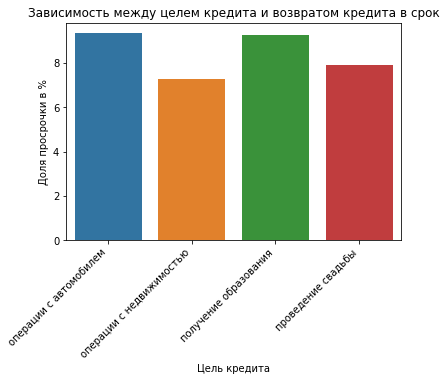

In [35]:
sns.barplot(x=data_purpose.index, y=data_purpose['%'])
plt.xticks(rotation=45, ha='right')
plt.title('Зависимость между целем кредита и возвратом кредита в срок')
plt.xlabel('Цель кредита')
plt.ylabel('Доля просрочки в %')
plt.show()

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Судя по количеству недостающих данных, кажется, что отсутствие данных связано с человеческим фактором - оператор не внес размер дохода и стаж заемщика или какой-то определенный контрагент не собирает эти данные. Возможно, при более глубоком анализе можно будет обнаружить, что пропуски связаны с какой-то определенной категорией (например, заемщики по образовательным кредитам, которые не имеют стажа и дохода).

Причина пропуска может быть технологической - это сбой работы БД при выгрузке, сбой работы приложений, при внесении данных в базу, неудачная миграция данных в процессе переноса данных или обновления АБС.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* замена пустых ячеек на медианное значение является оптимальным. Таким образом мы сохраняем остальные данные в этимх строках и не вносим искажения в общую статистику по пустым ячейкам.

*Ответ:*

Когда мы обнаружили пустые значения можно сделать несколько действий с этими значениями.

* Ничего не делать
Тогда эти значения будут мешать операциям с ячейками и искажать данные. Например, если мы захотим посчитать средний стаж по определенной группе, нам надо будет поделить общий стаж на количество людей. При этом, мы ошибемся не посчитав пустые ячейки. Таким образом среднее значение будет отличаться от реального.

* Удалить строки с пустыми значениями
Это сделать можно, если нет никаких разумных подходов по заполнению этих пустых значений и удаление такого количества данных не скажется на общие посчеты

* Заменить значения на определенные, заранее заданные
Для этого необходимо определиться, на что меняем пустые значения. Пустые значения можно заменить медианным или среднеарифметическим значением. Среднеарифметическое значение чувствительно к пиковым и экстремальным значениям в выборке и не всегда отображает реальность. В то же время медианное значение не искажает картину распределения по пользователям. Например, если в выборке появится несколько людей с экстремально высокими или низкими показателями, они не повлияют (или не значительно повлияют) на медианное значение, когда среднеарифметическое значение может резко вырасти или уменьшиться. Среднее арифметическое может совпадать с медианой только в симметричных выборках, что на практике встречается крайне редко.

Таким образом, замена пустых ячеек на медианное значение является оптимальным. Таким образом мы сохраняем остальные данные в этимх строках и не вносим искажения в общую статистику по пустым ячейкам.

### Шаг 4: общий вывод.

В целях снижения уровня просроченных кредитов рекомендуем Заказчику пересмотреть скоринговую политику в отношении следующих групп клиентов:

* клиентов с детьми;
* не женатых/холостых, а также клиентов, проживающих в гражданском браке;
* клиентов, подающих заявку на автокредитование.

Для улучшения системы скоринга клиентов была проанализирована выборка текущих клиентов и их задолженностей по платежам.

Для анализа был получен датафрейм содержащий 21525 записей и 12 столбцов:

Описание данных
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

В столбцах days_employed и  total_income было обнаружено по 2174 пропущенных значения.
Пропущенные значения в total_income заменили на медианный доходо среди всех записей с тем же типом.
Аномальные значения (отрицательный трудовой стаж) в days_employed замениили на положительные значения.

У двух типов (безработные и пенсионеры) получились аномально большие значения трудового стажа. Исправить такие значения сложно, поэтому оставили их без изменений, принимая во внимание,что эти столбцы не понадобятся для целей исследования.

В столбце children были обнаружены два аномальных значения -1 и 20 - исключили их.

Пропуски в столбце days_employed заменили медианными значениями каждого типа занятости income_type.

Произвели замену вещественного типа данных в столбце total_income на целочисленный с помощью метода astype().

Обработали неявные дубликаты в столбце education. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Привели их к нижнему регистру. Оставшиеся явные дубликаты - удалили из выборки.

Cоздаkb в датафрейме data столбец total_income_category с категориями по диапазонам зарплат:

0–30000 — 'E';
30001–50000 — 'D';
50001–200000 — 'C';
200001–1000000 — 'B';
1000001 и выше — 'A'.


Привели разномастные варианты целей кредита (purpose) к 4:
* 'операции с автомобилем',
* 'операции с недвижимостью',
* 'проведение свадьбы',
* 'получение образования'.

Для тоого, чтобы ранжировать категории по возрастанию риска невозврата (или просрочек) по кредиту, необходимо сгруппировать клиентов по искомым категориям, посчитать их просрочки и найти процент клиентов от текущей группы, которые имеют задолженность.

В рамках анализа были проверены следующие гипотезы:

*Есть ли зависимость между количеством детей и возвратом кредита в срок?*

В рамках данного исследования не удалось оценить группы клиентов с 4 и 5 детьми - выборка оказалась слишком малой для анализа.

Заемщики без детей выплачивают кредиты исправнее, чем заемщики с детьми.Несмотря на максимальное количество клиентов с просроченными кредитами у которых нет детей, доля их в сравнении с иными категориями клиентов меньшая и составляет 7,54 %, в то время как доли просроченных кредитов у клиентов имеющих от 1 до 4 детей - от 8,18 % до 9,76 %. В силу малого количества попавших в выборку клиентов с 5-ю детьми, данные по ним можно нивелировать.



*Есть ли зависимость между семейным положением и возвратом кредита в срок?*

По результатам проверки данной гипотезы выявлена следующая закономерность - меньше всего просрочек по кредитам у вдов/вдовцев (6.62%), больше всего у клиентов, не состоящих в отношениях (9.76%). Самой массовой категорией являются клиенты в браке, процент просрочек по данной категории составляет 7.56%



*Есть ли зависимость между уровнем дохода и возвратом кредита в срок?*

По результатам проверки данной гипотезы выявлена следующая закономерность - меньше всего просрочек по кредитам у клиентов с уровнем дохода от 30 000 до 50 000 руб в месяц (6.02%), больше всего у клиентов с уровнем дохода от 50 000 до 200 000 - 8,5%

Категория клиентов с экстремальными значениями доходов (ниже 30 000 руб или выше 1 000 000 руб) являются слишком малой. Достоверно говорить о вероятностях просрочек от этих клиентов нельзя.



*Как разные цели кредита влияют на его возврат в срок?*

По результатам проверки данной гипотезы выявлена следующая закономерность - меньше всего просрочек по кредитам по займам на недвижимость (7.26%), больше всего по займам на автомобиль (9.35%). Самой массовой категорией являются займы на недвижимость
Важно обратить внимание на кредит на образование так как он несет высокие риски не возврата, что, видимо, связанно с проблемами трудоустройства после обучения.



Помимо проведенного анализа, было бы неплохо еще провести анализ по количеству дней просрочки и объемам просрочек. Этот анализ позволит определить более точно, какая группа, с точки зрения задолженности порождает наибольшие финансовые проблемы. Данные можно использовать для скоринга.